# 6. Laplace Transforms

```{note}

In the realm of differential equations, the Laplace Transform is a crucial and powerful tool that simplifies the process of solving complex equations. This mathematical operation is named after Pierre-Simon Laplace, a French mathematician and astronomer whose work was foundational to many branches of mathematics.

The essence of the Laplace Transform lies in its ability to convert differential equations, which involve rates of change and are dependent on time, into algebraic equations, which are easier to manipulate. In this conversion process, complex patterns of time-dependent behavior are mapped into a domain where they are described as simple functions of a complex variable.

In this chapter, we will explore the fundamentals of Laplace Transforms, beginning with its definition and properties. We'll investigate how to apply Laplace Transforms to linear ordinary differential equations, including initial and boundary value problems. We will also study the Inverse Laplace Transform, a crucial technique for reclaiming our original function after performing operations in the Laplace domain. By leveraging Laplace Transforms, we can tackle systems that would be otherwise intimidating or intractable, such as those involving discontinuous or impulsive forces. This method is extensively used in various fields, including engineering, physics, and mathematics, to solve real-world problems ranging from electric circuit analysis to modeling population growth or decay.
```

### 6.1 Introduction to Laplace Transforms

Let $f(t)$ be a function and consider the integeral

$$
\mathcal{L}(f(t)) = \int_{0}^{\infty} e^{-st}f(t) \mathrm{d}t \equiv F(s).
$$

If this integral is finite, then $\mathcal{L}(f(t))$ (also denoted $F(s)$) is called the **Laplace transform**of $f(t)$. Note that not all function have Laplace transforms.

```{admonition} Example

Find the Laplace transform of $f(t)=1$.

$$\mathcal{L}(1) = \int_{0}^{\infty} e^{-st} \mathrm{d}t$$
$$= \lim_{R \rightarrow \infty} \int_{0}^{R} e^{-st} \mathrm{d}t$$
$$= \lim_{R \rightarrow \infty} -\dfrac{1}{s} e^{-st}\bigm|_{t=0}^{t=R}$$
$$= \left[\lim_{R \rightarrow \infty} -\dfrac{1}{s} e^{-sR} \right] + \dfrac{1}{s}$$

Notice that if $s<0$, then the limit goes to $\infty$ and if $s>0$, the limit goes to $0$. Thus $\mathcal{L}(1) = \dfrac{1}{s}$ for $s >0$.
```

In [2]:
#We can also do this example in the Jupyter notebook.
from sympy import symbols, LaplaceTransform, Function

t, s = symbols('t s')
f = Function('f')(t)

# Define the function
f = 1

# Compute Laplace transform
F = LaplaceTransform(f, t, s).doit()

print("The Laplace transform of f(t) = 1 is:", F)

The Laplace transform of f(t) = 1 is: (1/s, 0, True)


```{admonition} Example

Find the Laplace transform of $f(t)=e^{at}$.

$$\mathcal{L}(e^{at}) = \int_{0}^{\infty} e^{-st}e^{at} \mathrm{d}t$$
$$= \lim_{R \rightarrow \infty} \int_{0}^{R} e^{(a-s)t} \mathrm{d}t$$
$$= \lim_{R \rightarrow \infty} \dfrac{1}{a-s} e^{(a-s)t}\bigm|_{t=0}^{t=R}$$
$$= \left[\lim_{R \rightarrow \infty} \dfrac{1}{a-s} e^{(a-s)R} \right] - \dfrac{1}{a-s}$$

Notice that if $s<a$, then the limit goes to $\infty$ and if $s>a$, the limit goes to $0$. Thus $\mathcal{L}(1) = -\dfrac{1}{a-s} \dfrac{1}{s-a}$ for $s >a$.
```

In [3]:
from sympy import symbols, LaplaceTransform, Function, exp

t, s, a = symbols('t s a')
f = Function('f')(t)

# Define the function
f = exp(a*t)

# Compute Laplace transform
F = LaplaceTransform(f, t, s).doit()

print("The Laplace transform of f(t) = e^(at) is:", F)

The Laplace transform of f(t) = e^(at) is: (1/(-a + s), a, True)


Given that a function does not always have a Laplace transform (see Exercise 4), it is worthwhile to discuss requirements for a function to have a Laplace transform. First, the function must be piecewise continuous. In other words, $f(t)$ is continuous except at possibly finitely many points. If $f(t)$ is discontinuous at $t_k$, then $\lim_{t \rightarrow t_k^-} f(t)$ and $\lim_{t \rightarrow t_k^+} f(t)$ are both finite. Secondly, the function must have exponential order. In other words, there must be some numbers $M,a,T$ such that $|f(t)| \leq Me^{at}$ for $t >T$.

**Linearity of Laplace Transforms** If $f(t)$ and $g(t)$ are both piecewise continuous functions of exponential order, then
$$\mathcal{L}(af(t)+bg(t)) = a \mathcal{L}(f(t)) + b \mathcal{L}(g(t)).$$

Summary
| Initial Function       | Laplace Transform of that Function     | 
| :----------- | :----------- |
| $1$ | $\dfrac{1}{s}$, if $s>0$ |
| $e^{at}$ | $\dfrac{1}{s-a}$, if $s>a$ |
| $\sin(bt)$ | $\dfrac{b}{s^2+b^2}$ |
| $\cos(bt)$ | $\dfrac{s}{s^2+b^2}$ |
| $af(t)+bg(t)$ | $aF(s)+bG(s)$ (Linearity) |
| $f'(t)$ | $sF(s)-f(0)$ |
| $f''(t)$ | $s^2F(s) - sf(0) -f'(0)$ |

### 6.2 The Inverse Laplace Transform

```{admonition} Example

Consider the linear initial value problem

$$x'+4x = e^{-5t}, \quad x(0)=1.$$

Find the Laplace transform of the solution $x(t)$.

$$\mathcal{L}(x' + 4x) = \mathcal{L}(e^{-5t})$$
$$\mathcal{L}(x') + 4\mathcal{L}(x) = \mathcal{L}(e^{-5t})$$
$$s\mathcal{L}(x)-x(0)+4\mathcal{L}(x) = \dfrac{1}{s+5}$$
$$(s+4)\mathcal{L}(x)-1 = \dfrac{1}{s+5}$$
$$(s+4)\mathcal{L}(x) = \dfrac{1}{s+5}+ \dfrac{s+5}{s+5}$$
$$(s+4)\mathcal{L}(x) = \dfrac{s+6}{s+5}$$
$$\mathcal{L}(x) = \dfrac{s+6}{(s+5)(s+4)}$$


Now we want to know, what function $x(t)$ has $\mathcal{L}(x) = \dfrac{s+6}{(s+5)(s+4)}$?
```

The function $f(t)$ which has Laplace transform $F(s)$ is called the **inverse Laplace transform of** $F(s)$. So long as all of the functions are piecewise continuous of exponential order, this transformation is unique, except possibly at the points of discontinuity. Moreover, the inverse Laplace transform is a linear operator. That is,
$$ \mathcal{L}^{-1}(aF(s)+bG(s)) = a \mathcal{L}^{-1}(F(s))+b \mathcal{L}^{-1}(G(s)).$$

```{admonition} Example (continued)

Find the inverse Laplace transform for $\mathcal{L}(x) = \dfrac{s+6}{(s+5)(s+4)}$.

First, we can use partial fractions to split this into more reasonable pieces.


$$\dfrac{s+6}{(s+5)(s+4)} = \dfrac{A}{s+5} + \dfrac{B}{s+4}$$


$$s+6 = A(s+4) + B(s+5)$$

If $s=-4$, then $2 = A(0) + B(1)$, thus $B=2$.
If $s=-5$, then $1 = A(-1) + B(0)$, thus $A=-1$.

So $\mathcal{L}(x) = \dfrac{-1}{s+5} + \dfrac{2}{s+4}$. Recall that $\mathcal{L}(e^{at}) = \dfrac{1}{s-a}$. Thus $\mathcal{L}(x) = -\mathcal{L}(e^{-5t}) + 2 \mathcal{L}(e^{-4t})$. So $x(t) = -e^{-5t}+2e^{-4t}$, which is the solution to the initial-value problem given in the previous example!
```

In order to solve differential equations with Laplace transforms, we will:

*Step 1*: Take the Laplace transform of both sides and set them equal.

*Step 2*: Enter initial conditions (if needed)

*Step 3*: Solve the equation algebraically for the transform $\mathcal{L}(X)$, which we will now denote $X(s)$, of the unknown function $x(t)$.

*Step 4*: Invert $X(s)$ to find $x(t)$.

```{admonition} Example

Consider the linear initial value problem


$$x''+4x = 8, \quad x(0)=0, \quad x'(0)=0.$$


Find the Laplace transform of the solution $x(t)$.

$$\mathcal{L}(x'' + 4x) = \mathcal{L}(8)$$
$$\mathcal{L}(x'') + 4\mathcal{L}(x) = \mathcal{L}(8)$$
$$s^2X(s) - sx(0)-x'(0)+4X(s) = \dfrac{8}{s}$$
$$(s^2+4)X(s) = \dfrac{8}{s}$$
$$X(s) = \dfrac{8}{(s)(s^2+4)}$$

Now use partial fractions


$$\dfrac{8}{(s)(s^2+4)} = \dfrac{A}{s} + \dfrac{Bs+C}{s^2+4}$$
$$8 = (s^2+4)A + s(Bs+C)$$

Solving for $A$, $B$, and $C$, yields $A = 2$, $B=-2$, and $C=0$.

Thus $X(s) = \dfrac{-2s}{s^2+4} + \dfrac{2}{s} = -2 \left(\dfrac{s}{s^2+2^2}\right) +2 \left(\dfrac{1}{s}\right)$. Therefore, $x(t) = -2\cos(2t)+2$.
```

### 6.3 More Laplace Transforms & the Heaviside Function

`````{admonition} Theorem
:class: tip

If $f(t)$ is any piecewise contiunous function of exponential order, then $$\mathcal{L}(e^{at}f(t)) = F(s-a) \quad \text{ where } F(s) = \mathcal{L}(f(t)).$$
`````

`````{admonition} Theorem
:class: tip

Theorem

If $f(t)$ is any piecewise contiunous function of exponential order, then 

$$\mathcal{L}(tf(t)) = -\dfrac{d}{ds}F(s) \quad \text{ where } F(s) = \mathcal{L}(f(t)).$$

`````

Let's update our table to take in this new information

| Initial Function      | Laplace Transform of that Function     | 
| :----------- | :----------- |
| $1$ | $\dfrac{1}{s}$, if $s>0$ |
| $e^{at}$ | $\dfrac{1}{s-a}$, if $s>a$ |
| $\sin(bt)$ | $\dfrac{b}{s^2+b^2}$ |
| $\cos(bt)$ | $\dfrac{s}{s^2+b^2}$ |
| $af(t)+bg(t)$ | $aF(s)+bG(s)$ (Linearity) |
| $f'(t)$ | $sF(s)-f(0)$ |
| $f''(t)$ | $s^2F(s) - sf(0) -f'(0)$ |
| $t$ | $\dfrac{1}{s^2}$ |
| $tf(t)$ | $-\dfrac{d}{ds}F(s)$ |
| $t^n$ | $\dfrac{n!}{s^{n+1}}$ |
| $te^{at}$ | $\dfrac{1}{(s-a)^2}$ |
| $e^{at}f(t)$ | $F(s-a)$ |
| $e^{at}\sin(bt)$ | $\dfrac{b}{(s-a)^2+b^2}$ |
| $e^{at}\cos(bt)$ | $\dfrac{s-a}{(s-a)^2+b^2}$ |

Now we will explore how we invert terms of the form $\dfrac{As+B}{s^2+cs+d}$ where $s^2+cs+d$ is an irreducible quadratic. To do this we will complete the square, that is, we will write $$s^2+cs+d=s^2+cs+\left(\dfrac{c}{2} \right)^2 + d -\left(\dfrac{c}{2} \right)^2= \left(s+\dfrac{c}{2}\right)^2 + \left(\sqrt{d-\dfrac{c}{2}^2} \right)^2 =(s-a)^2+b^2.$$ If we complete the square, then

$$\dfrac{As+B}{s^2+cs+d} = c_1 \left( \dfrac{s-a}{(s-a)^2+b^2} \right) + c_2 \left(\dfrac{b}{(s-a)^2+b^2} \right) = c_1 \mathcal{L}(e^{at}\cos(bt))+c_2 \mathcal{L}(e^{at}\sin(bt)).$$

```{admonition} Example

Find the inverse Laplace Transform of 

$$\dfrac{4s+2}{s^2+2s+5}.$$

Notice the denominator is an irreducible quadratic, so we need to complete the square.

$$s^2+2s+5 = s^2+2s+\left(\dfrac{2}{2} \right)^2 + 5 - \left(\dfrac{2}{2} \right)^2 = (s+1)^2+4 = (s-(-1))^2+2^2$$

Thus, 

$$\mathcal{L}^{-1}\left(\dfrac{4s+2}{s^2+2s+5} \right) = 4 \mathcal{L}^{-1}\left(\dfrac{s+1}{(s+1)^2+2^2}\right)- \mathcal{L}^{-1}\left(\dfrac{2}{(s+1)^2+2^2}\right) = 4e^{-t}\cos(2t) - e^{-t}\sin(2t).$$

```

The **unit step function** (also called the **Heaviside function**) at $t=c$ is the function $$u(t-c) = \begin{cases} 0 & \text{ if } t < c \\ 1 & \text{ if } t>c \end{cases} .$$ 

More importantly, the Laplace transform of the Heaviside function exists and any piecewise continuous function can be expressed in terms of the Heaviside function. The Heaviside function for $c=0$ is plotted below.

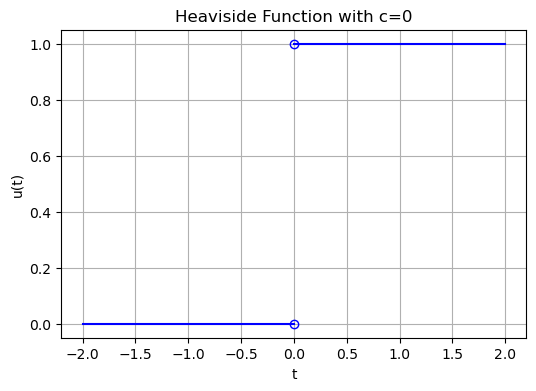

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the unit step function
def unit_step(t):
    return np.heaviside(t, 1)

# Generate a range of x values
t = np.linspace(-2, 2, 1000)

# Calculate the corresponding y values
y = unit_step(t)

# Create the plot
plt.figure(figsize=(6, 4))

# Plot two separate lines to remove vertical line at t=0
plt.plot(t[t<0], y[t<0], 'b')
plt.plot(t[t>=0], y[t>=0], 'b')

# Add points at (0,0) and (0,1)
plt.plot(0, 0, 'bo', fillstyle='none')
plt.plot(0, 1, 'bo', fillstyle='none')

plt.title('Heaviside Function with c=0')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid(True)
plt.show()

```{admonition} Example

Consider the function $$f(t) = \begin{cases} 4-t & \text{ if } 0 \leq t \leq \pi \\ 4+\cos(t) & \text{ if } t>pi \end{cases}$$
plotted below. Express this function in terms of the Heaviside function.
```

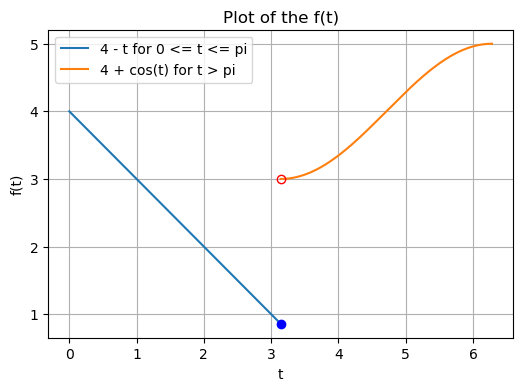

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise functions
def f1(t):
    return 4 - t

def f2(t):
    return 4 + np.cos(t)

# Generate a range of t values for each piece
t1 = np.linspace(0, np.pi, 500)
t2 = np.linspace(np.pi, 2*np.pi, 500)

# Calculate the corresponding y values using the piecewise function
y1 = f1(t1)
y2 = f2(t2)

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(t1, y1, label='4 - t for 0 <= t <= pi')
plt.plot(t2, y2, label='4 + cos(t) for t > pi')

# Add markers for the specific points
plt.plot(np.pi, 4 - np.pi, 'bo')  # filled blue circle
plt.plot(np.pi, 3, 'ro', markerfacecolor='none')  # open red circle

plt.title('Plot of the f(t)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

To express $f(t)$ in terms of the Heaviside function, notice that $f(t) = 4-t + u(t-\pi)(4+\cos(t)-(4-t))$. Now we'd like to find the Laplace transform of $u(t-\pi)(4+\cos(t)-(4-t))$ in order to be able to solve initial-value problems. The following theorem will help us do exactly that.

`````{admonition} Theorem
:class: tip

Let $f(t)$ be a piecewise continuous function of exponential order and let $u(t-c)$ be the unit step function for some $c$. Then
- $\mathcal{L}(u(t-c)) = \dfrac{e^{-cs}}{s}$
- $\mathcal{L}(u(t-c)f(t-c)) = e^{-cs}F(s)$
- $\mathcal{L}(u(t-c)f(t)) = e^{-cs}G(s)$ where $G(s) = \mathcal{L}(f(t+c))$

`````

```{admonition} Example (continued)

Consider the function 

$$f(t) = \begin{cases} 4-t & \text{ if } 0 \leq t \leq \pi \\ 4+\cos(t) & \text{ if } t>pi. \end{cases}
$$

Find $\mathcal{L}(f(t))$.

Since $f(t) = 4-t + u(t-\pi)(4+\cos(t)-(4-t))$, we know

$$\mathcal{L}(f(t)) = \mathcal{L}(4) - \mathcal{L}(t) + \mathcal{L}(u(t-\pi)(4+\cos(t)-(4-t)))$$
$$\mathcal{L}(f(t)) = \dfrac{4}{s} - \dfrac{1}{s^2} + \mathcal{L}(u(t-\pi)(4+\cos(t)-(4-t)))$$
$$\mathcal{L}(f(t)) = \dfrac{4}{s} - \dfrac{1}{s^2} + \mathcal{L}(u(t-\pi)(\cos(t)+t))$$
$$\mathcal{L}(f(t)) = \dfrac{4}{s} - \dfrac{1}{s^2} + e^{-\pi s}G(s) \text{ where } G(s) = \mathcal{L}(\cos(t)+t+\pi)$$
$$\mathcal{L}(f(t)) = \dfrac{4}{s} - \dfrac{1}{s^2} + e^{-\pi s}\left(\dfrac{s}{s^2+\pi^2} + \dfrac{1}{s^2} + \dfrac{\pi}{s}\right)$$

`````

### Exercises

```{admonition} Exercises

1. By hand show that the Laplace transforms of $\cos(bt)$ and $\sin(bt)$ are the functions listed in the chart.
    
2. Show that the Laplace transform of $f'(t)$ is $sF(s)-f(0)$.

3. Show that the Laplace transform of $f''(t)$ is $s^2F(s)-sf(0)-sf'(0)$.

4. Show that the function $g(x) = e^{t^2}$ does not have a Laplace transform.

5. Find the Laplace transform of $f(t) = 8+3e^{2t}-\cos(6t)$.

6. Solve the initial value problem

$$x'' + 4x'+3x = 10\cos(t), \quad x(0)=2, \quad x'(0)=3.$$

7. Solve the initial value problem

$$x'' + 2x'+3x = 9t, \quad x(0)=1, \quad x'(0)=2.$$

8. Let $f(t) = \begin{cases} t & \text{ if } 0 \leq t \leq 2 \\ 0 & \text{ if } t>2 \end{cases}$. Solve the initial value problem

$$
x'' + x = f(t), \quad x(0)=0, \quad x'(0)=0.
$$ 

*Hint: First rewrite $f(t)$ using the Heaviside function so that you can take the Laplace transform of both sides.*
`````